In [ ]:
from google.colab import files
uploaded = files.upload()

Saving application_data.csv to application_data.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #plotting
import seaborn as sns # plotting
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

The learning and prediction phrases of machine learning algorithms can be impacted by the issue of imbalanced datasets. This imbalance refers to the difference in the number of samples across different classes. We demonstrate the effect of training a Logistic Regression classifier with varying levels of class balancing by adjusting their weights : from the imblearn library

In [ ]:
df = pd.read_csv('application_data.csv') #file downloaded from kaggle.com, found this dataset from youtube, anonymized dataset
#About this file
#Each transaction is labeled as either fraudulent (1) or non-fraudulent (0), making it an ideal dataset for training and evaluating fraud detection systems.

In [ ]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


array([[<Axes: title={'center': 'SK_ID_CURR'}>,
        <Axes: title={'center': 'TARGET'}>,
        <Axes: title={'center': 'CNT_CHILDREN'}>,
        <Axes: title={'center': 'AMT_INCOME_TOTAL'}>,
        <Axes: title={'center': 'AMT_CREDIT'}>,
        <Axes: title={'center': 'AMT_ANNUITY'}>,
        <Axes: title={'center': 'AMT_GOODS_PRICE'}>,
        <Axes: title={'center': 'REGION_POPULATION_RELATIVE'}>,
        <Axes: title={'center': 'DAYS_BIRTH'}>,
        <Axes: title={'center': 'DAYS_EMPLOYED'}>],
       [<Axes: title={'center': 'DAYS_REGISTRATION'}>,
        <Axes: title={'center': 'DAYS_ID_PUBLISH'}>,
        <Axes: title={'center': 'OWN_CAR_AGE'}>,
        <Axes: title={'center': 'FLAG_MOBIL'}>,
        <Axes: title={'center': 'FLAG_EMP_PHONE'}>,
        <Axes: title={'center': 'FLAG_WORK_PHONE'}>,
        <Axes: title={'center': 'FLAG_CONT_MOBILE'}>,
        <Axes: title={'center': 'FLAG_PHONE'}>,
        <Axes: title={'center': 'FLAG_EMAIL'}>,
        <Axes: title={'center'

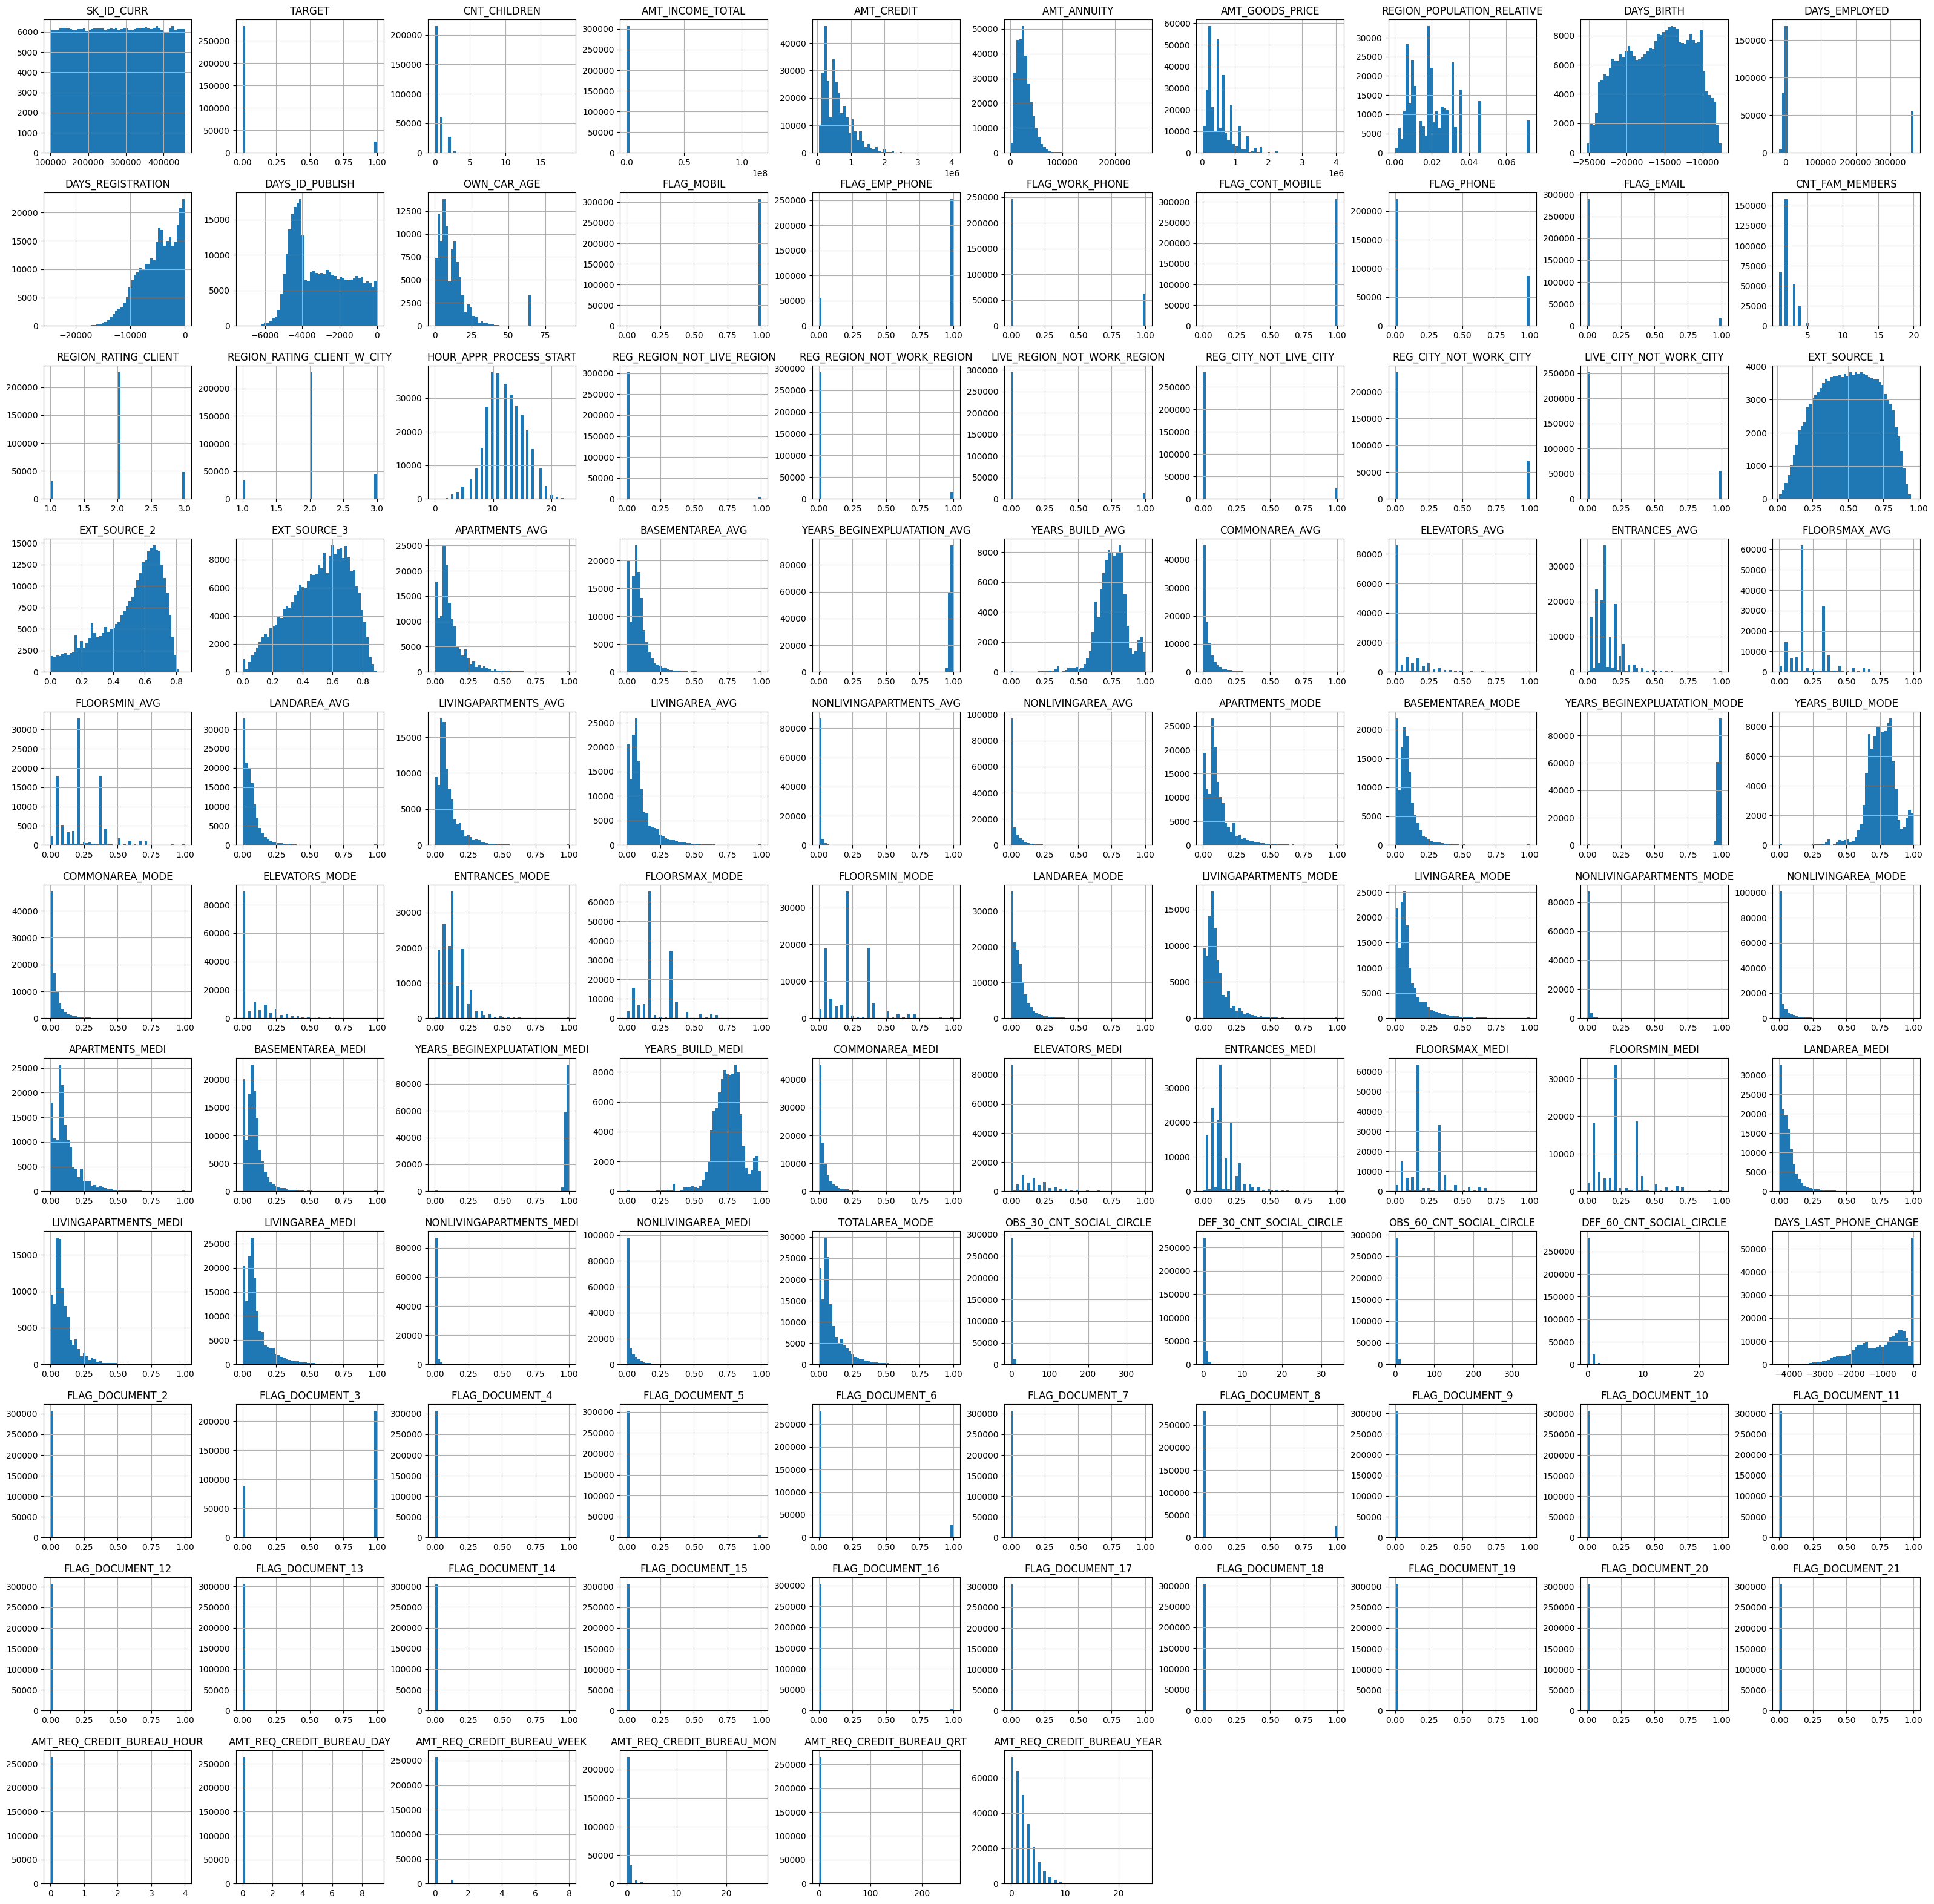

In [ ]:
df.hist(bins=50, figsize=(40,40))

In [ ]:
df.isnull().sum()
#there does

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519
AMT_REQ_CREDIT_BUREAU_WEEK,41519
AMT_REQ_CREDIT_BUREAU_MON,41519
AMT_REQ_CREDIT_BUREAU_QRT,41519


In [ ]:
# 1. Total missing values per column
missing_counts = df.isnull().sum()

# 2. Filter only columns with missing values
missing_data = missing_counts[missing_counts > 0]
print("Columns with missing values:\n")
print(missing_data)

# 3. Percentage of missing values (optional but helpful)
missing_percentage = (missing_data / len(df)) * 100
print("\nPercentage of missing values:\n")
print(missing_percentage.sort_values(ascending=False))

Columns with missing values:

AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
OWN_CAR_AGE                   202929
OCCUPATION_TYPE                96391
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
Length: 67, dtype: int64

Percentage of missing values:

COMMONAREA_MEDI             69.872297
COMMONAREA_MODE             69.872297
COMMONAREA_AVG              69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_MEDI    69.432963
                              ...    
EXT_SOURCE_2                 0.214626
AMT_GOODS_PRICE              0.090403
AMT_ANNUITY                  0.003902
CNT_FAM_MEMBERS              0.000650
DAYS_LAST_PHONE_CHANGE       0.000325
Length: 67, dtype: float64


In [ ]:
'TARGET' in df.columns

True

In [ ]:
'SK_ID_CURR' in df.columns

True

This is like a real dataset, because it has a lot of data missing. Thereafter we will divide the dataset : Dividing the datasets into class and features
Selecting target variables

In [ ]:
X = df.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y = df['TARGET']

In [ ]:
print(X.columns.tolist())
print(len(X.columns))

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_

https://imbalanced-learn.org/stable/auto_examples/applications/plot_impact_imbalanced_classes.html

In [ ]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
# 1. Impute all missing values (mean for numeric)
# imputer = SimpleImputer(strategy='mean')
# X_imputed = imputer.fit_transform(X)

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'Cash loans'

In [ ]:
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# 3. Preprocessing for numeric and categorical
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# 4. Combine them using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# 5. Fit and transform
X_processed = preprocessor.fit_transform(X)

Now this can again be used to do the random forest
let's try it out, following all the same steps as before

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((246008, 244), (61503, 244), (246008,), (61503,))

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#SVM, k-NN are sensitive to feature values and thus they alwsys need to be scaled

In [ ]:
print(pd.Series(y_train).value_counts(normalize=True))
print(pd.Series(y_test).value_counts(normalize=True))
#does really correspond to a real world set as the number of fraud is much much lower than the real dataset,
#which would not be the situation in real-life and it would
#be a highly imbalanced dataset

TARGET
0    0.919206
1    0.080794
Name: proportion, dtype: float64
TARGET
0    0.919532
1    0.080468
Name: proportion, dtype: float64


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100 , max_depth = 10, min_samples_split=5, random_state=42)

In [ ]:
# X_sample = X_train_scaled[:10000]
# y_sample = y_train[:10000]

# cv_scores = cross_val_score(rf_model, X_sample, y_sample, cv=5, scoring='f1')
# print("\nCross-Validation F1 scores: ", cv_scores)
# print("Average F1 score:", np.mean(cv_scores))


Cross-Validation F1 scores:  [0. 0. 0. 0. 0.]
Average F1 score: 0.0


Does this mean I cannot use random forest ?

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))
#Class 1, i.e. the fraud samples is very less

{np.int64(0): np.int64(226132), np.int64(1): np.int64(19876)}


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

SMOTE technique to balance class imbalance : The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/


https://learn.microsoft.com/en-us/azure/machine-learning/component-reference/smote?view=azureml-api-2

In [ ]:
# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

#I again need to cut my data, because my computer is crappy
X_sample = X_train_bal[:10000]
y_sample = y_train_bal[:10000]

# Confirm balanced sample
unique, counts = np.unique(y_bal, return_counts=True)
print("After SMOTE:", dict(zip(unique, counts)))  # Should be {0: 9206, 1: 9206}

# Define stratified k-fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) #Ensures that each fold in cross-validation has the same class ratio as the full dataset.It’s like stratified sampling for each fold.

# Define model with class_weight just in case
rf_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    min_samples_split=5,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Cross-validation
cv_scores = cross_val_score(rf_model, X_sample, y_sample, cv=cv, scoring='f1')
print("\nCross-Validation F1 scores:", cv_scores)
print("Average F1 score:", np.mean(cv_scores))

print("Before SMOTE:", dict(zip(*np.unique(y_train, return_counts=True))))
print("After SMOTE:", dict(zip(*np.unique(y_train_bal, return_counts=True))))

After SMOTE: {np.int64(0): np.int64(9206), np.int64(1): np.int64(9206)}

Cross-Validation F1 scores: [0.21573034 0.22978723 0.26907631 0.24255319 0.25726141]
Average F1 score: 0.2428816957239664
Before SMOTE: {np.int64(0): np.int64(226132), np.int64(1): np.int64(19876)}
After SMOTE: {np.int64(0): np.int64(226132), np.int64(1): np.int64(226132)}


In [ ]:
rf_model.fit(X_sample, y_sample)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5, n_estimators=50, n_jobs=-1,
                       random_state=42)

In [ ]:
# Use smaller test sample too
X_test_sample = X_test_scaled[:10000]
y_test_sample = y_test[:10000]

# Train
rf_model.fit(X_sample, y_sample)

# Predict
y_pred = rf_model.predict(X_test_sample)

In [ ]:
print(classification_report(y_test_sample, y_pred))
#this is a mediocre result, for the 1 labels, all the metrics are pretty bad

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      9177
           1       0.18      0.39      0.25       823

    accuracy                           0.80     10000
   macro avg       0.56      0.61      0.57     10000
weighted avg       0.88      0.80      0.83     10000



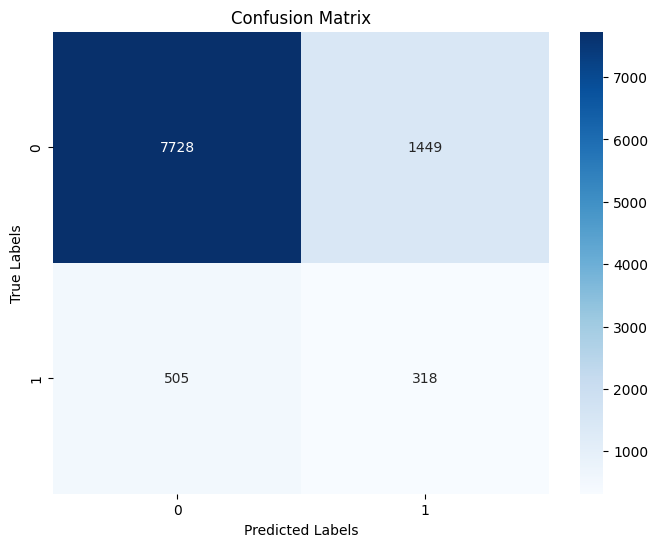

In [ ]:
plt.figure(figsize =(8,6))
cm = confusion_matrix(y_test_sample, y_pred) #how often predicted labels match the true labels
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues') #format annotation
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

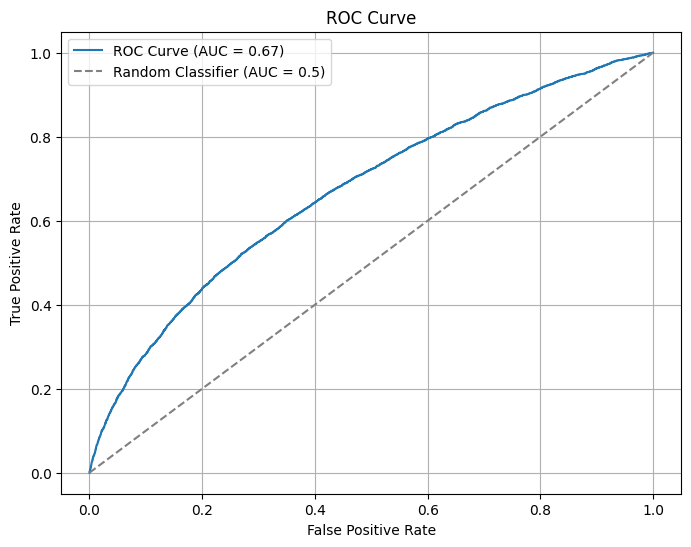

In [ ]:
# 1. Get predicted probabilities for the positive class
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# 2. Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 3. Compute AUC
roc_auc = auc(fpr, tpr)

# 4. Plot it
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

Slightly larger sample size, but does not really change things much

In [ ]:
# Use smaller test sample too
X_test_sample = X_test_scaled[:100000]
y_test_sample = y_test[:100000]

# Train
rf_model.fit(X_sample, y_sample)

# Predict
y_pred = rf_model.predict(X_test_sample)

In [ ]:
print(classification_report(y_test_sample, y_pred))
#this is a mediocre result, for the 1 labels, all the metrics are pretty bad

              precision    recall  f1-score   support

           0       0.94      0.84      0.89     56554
           1       0.17      0.38      0.24      4949

    accuracy                           0.80     61503
   macro avg       0.56      0.61      0.56     61503
weighted avg       0.88      0.80      0.83     61503

